#Importação de bibliotecas


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings('ignore')

#Leitura de base

In [13]:
df = pd.read_excel('/content/Analise_Performance_Estudantes.xlsx')
display(df.head())

df

df.head()

display(df.tail())

df.info()

display(df.head(10))

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
4995,male,group D,some high school,free/reduced,none,67,67,55
4996,female,group B,some high school,free/reduced,none,67,61,56
4997,female,group C,associate's degree,free/reduced,completed,51,63,55
4998,male,group E,bachelor's degree,standard,none,60,46,55
4999,female,group C,bachelor's degree,free/reduced,none,78,82,87


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       5000 non-null   object
 1   race/ethnicity               5000 non-null   object
 2   parental level of education  5000 non-null   object
 3   lunch                        5000 non-null   object
 4   test preparation course      5000 non-null   object
 5   math score                   5000 non-null   int64 
 6   reading score                5000 non-null   int64 
 7   writing score                5000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 312.6+ KB


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50



#Mudança de nome das colunas

In [14]:
df = df.rename(columns={
    'gender': 'genero',
    'race/ethnicity': 'grupo_etnico',
    'parental level of education': 'nivel_escolaridade_dos_pais',
    'lunch': 'almoco',
    'test preparation course': 'curso_preparatorio_para_teste',
    'math score': 'nota_matematica',
    'reading score': 'nota_leitura',
    'writing score': 'nota_escrita'
})
display(df.head())

,genero,grupo_etnico,nivel_escolaridade_dos_pais,almoco,curso_preparatorio_para_teste,nota_matematica,nota_leitura,nota_escrita
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#Tratamento de dados

In [15]:
for column in df.columns:
    print(f"Valores únicos na coluna '{column}':")
    if df[column].dtype == 'object':
        print(df[column].unique())
    else:
        print(df[column].nunique())
    print("-" * 30)

df['genero'] = df['genero'].replace({'female': 'feminino', 'male': 'masculino'})
display(df.head())

df['grupo_etnico'] = df['grupo_etnico'].replace({
    'group A': 'grupo_A',
    'group B': 'grupo_B',
    'group C': 'grupo_C',
    'group D': 'grupo_D',
    'group E': 'grupo_E'
})
display(df.head())

df['nivel_escolaridade_dos_pais'] = df['nivel_escolaridade_dos_pais'].replace({
    "bachelor's degree": 'bacharelado',
    'some college': 'algum curso superior',
    "master's degree": 'mestrado',
    "associate's degree": 'curso tecnológico',
    'high school': 'ensino médio',
    'some high school': 'algum curso tecnico'
})
display(df.head())

df['almoco'] = df['almoco'].replace({
    'standard': 'padrao',
    'free/reduced': 'lanche'
})
display(df.head())

df['curso_preparatorio_para_teste'] = df['curso_preparatorio_para_teste'].replace({
    'none': 'nenhum',
    'completed': 'completo'
})
display(df.head())


Valores únicos na coluna 'genero':
['female' 'male']
------------------------------
Valores únicos na coluna 'grupo_etnico':
['group B' 'group C' 'group A' 'group D' 'group E']
------------------------------
Valores únicos na coluna 'nivel_escolaridade_dos_pais':
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
------------------------------
Valores únicos na coluna 'almoco':
['standard' 'free/reduced']
------------------------------
Valores únicos na coluna 'curso_preparatorio_para_teste':
['none' 'completed']
------------------------------
Valores únicos na coluna 'nota_matematica':
87
------------------------------
Valores únicos na coluna 'nota_leitura':
82
------------------------------
Valores únicos na coluna 'nota_escrita':
86
------------------------------


,genero,grupo_etnico,nivel_escolaridade_dos_pais,almoco,curso_preparatorio_para_teste,nota_matematica,nota_leitura,nota_escrita
0,feminino,group B,bachelor's degree,standard,none,72,72,74
1,feminino,group C,some college,standard,completed,69,90,88
2,feminino,group B,master's degree,standard,none,90,95,93
3,masculino,group A,associate's degree,free/reduced,none,47,57,44
4,masculino,group C,some college,standard,none,76,78,75


,genero,grupo_etnico,nivel_escolaridade_dos_pais,almoco,curso_preparatorio_para_teste,nota_matematica,nota_leitura,nota_escrita
0,feminino,grupo_B,bachelor's degree,standard,none,72,72,74
1,feminino,grupo_C,some college,standard,completed,69,90,88
2,feminino,grupo_B,master's degree,standard,none,90,95,93
3,masculino,grupo_A,associate's degree,free/reduced,none,47,57,44
4,masculino,grupo_C,some college,standard,none,76,78,75


,genero,grupo_etnico,nivel_escolaridade_dos_pais,almoco,curso_preparatorio_para_teste,nota_matematica,nota_leitura,nota_escrita
0,feminino,grupo_B,bacharelado,standard,none,72,72,74
1,feminino,grupo_C,algum curso superior,standard,completed,69,90,88
2,feminino,grupo_B,mestrado,standard,none,90,95,93
3,masculino,grupo_A,curso tecnológico,free/reduced,none,47,57,44
4,masculino,grupo_C,algum curso superior,standard,none,76,78,75


,genero,grupo_etnico,nivel_escolaridade_dos_pais,almoco,curso_preparatorio_para_teste,nota_matematica,nota_leitura,nota_escrita
0,feminino,grupo_B,bacharelado,padrao,none,72,72,74
1,feminino,grupo_C,algum curso superior,padrao,completed,69,90,88
2,feminino,grupo_B,mestrado,padrao,none,90,95,93
3,masculino,grupo_A,curso tecnológico,lanche,none,47,57,44
4,masculino,grupo_C,algum curso superior,padrao,none,76,78,75


,genero,grupo_etnico,nivel_escolaridade_dos_pais,almoco,curso_preparatorio_para_teste,nota_matematica,nota_leitura,nota_escrita
0,feminino,grupo_B,bacharelado,padrao,nenhum,72,72,74
1,feminino,grupo_C,algum curso superior,padrao,completo,69,90,88
2,feminino,grupo_B,mestrado,padrao,nenhum,90,95,93
3,masculino,grupo_A,curso tecnológico,lanche,nenhum,47,57,44
4,masculino,grupo_C,algum curso superior,padrao,nenhum,76,78,75


#Salvar base para download

In [16]:
output_filename = 'Analise_Performance_Estudantes_modificado.xlsx'
df.to_excel(output_filename, index=False)

from google.colab import files
files.download(output_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Cálculo de probabilidades básicas

# Calcular a probabilidade para cada gênero

In [17]:
probabilidade_genero = df['genero'].value_counts(normalize=True) * 100
# Exibir a probabilidade
print("Probabilidade por Gênero:")
display(probabilidade_genero)

Probabilidade por Gênero:


,proportion
genero,
feminino,52.24
masculino,47.76


# Calcular a probabilidade para cada grupo étnico

In [18]:

probabilidade_grupo_etnico = df['grupo_etnico'].value_counts(normalize=True) * 100

# Exibir a probabilidade
print("Probabilidade por Grupo Étnico:")
display(probabilidade_grupo_etnico)

Probabilidade por Grupo Étnico:


,proportion
grupo_etnico,
grupo_B,29.74
grupo_C,27.52
grupo_A,16.96
grupo_D,16.70
grupo_E,9.08


#Probabilidades condicionais

In [19]:
# Calcular a probabilidade condicional: P(grupo_etnico = 'grupo_A' | genero = 'feminino')
df_feminino = df[df['genero'] == 'feminino']
probabilidade_grupoA_dado_feminino = (df_feminino['grupo_etnico'] == 'grupo_A').mean() * 100

# Exibir a probabilidade condicional
print("Probabilidade de um estudante ser do grupo_etnico 'grupo_A' dado que é 'feminino':")
print(f"{probabilidade_grupoA_dado_feminino:.2f}%")

df_masculino_grupoC = df[(df['genero'] == 'masculino') & (df['grupo_etnico'] == 'grupo_C')]
probabilidade_bacharelado_dado_masculino_grupoC = (df_masculino_grupoC['nivel_escolaridade_dos_pais'] == 'bacharelado').mean() * 100

# Exibir a probabilidade condicional

print("Probabilidade do nível de escolaridade dos pais ser 'bacharelado' dado que o estudante é 'masculino' e do 'grupo_C':")
print(f"{probabilidade_bacharelado_dado_masculino_grupoC:.2f}%")

Probabilidade de um estudante ser do grupo_etnico 'grupo_A' dado que é 'feminino':
17.11%
Probabilidade do nível de escolaridade dos pais ser 'bacharelado' dado que o estudante é 'masculino' e do 'grupo_C':
18.83%


#Gráfico de pizza utilizando a plotly

In [20]:
categorical_columns = ['genero', 'grupo_etnico', 'nivel_escolaridade_dos_pais', 'almoco', 'curso_preparatorio_para_teste']

for col in categorical_columns:
    counts = df[col].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribuição por {col}')
    fig.show()

#Gráficos de coluna utilizando contagem absoluta

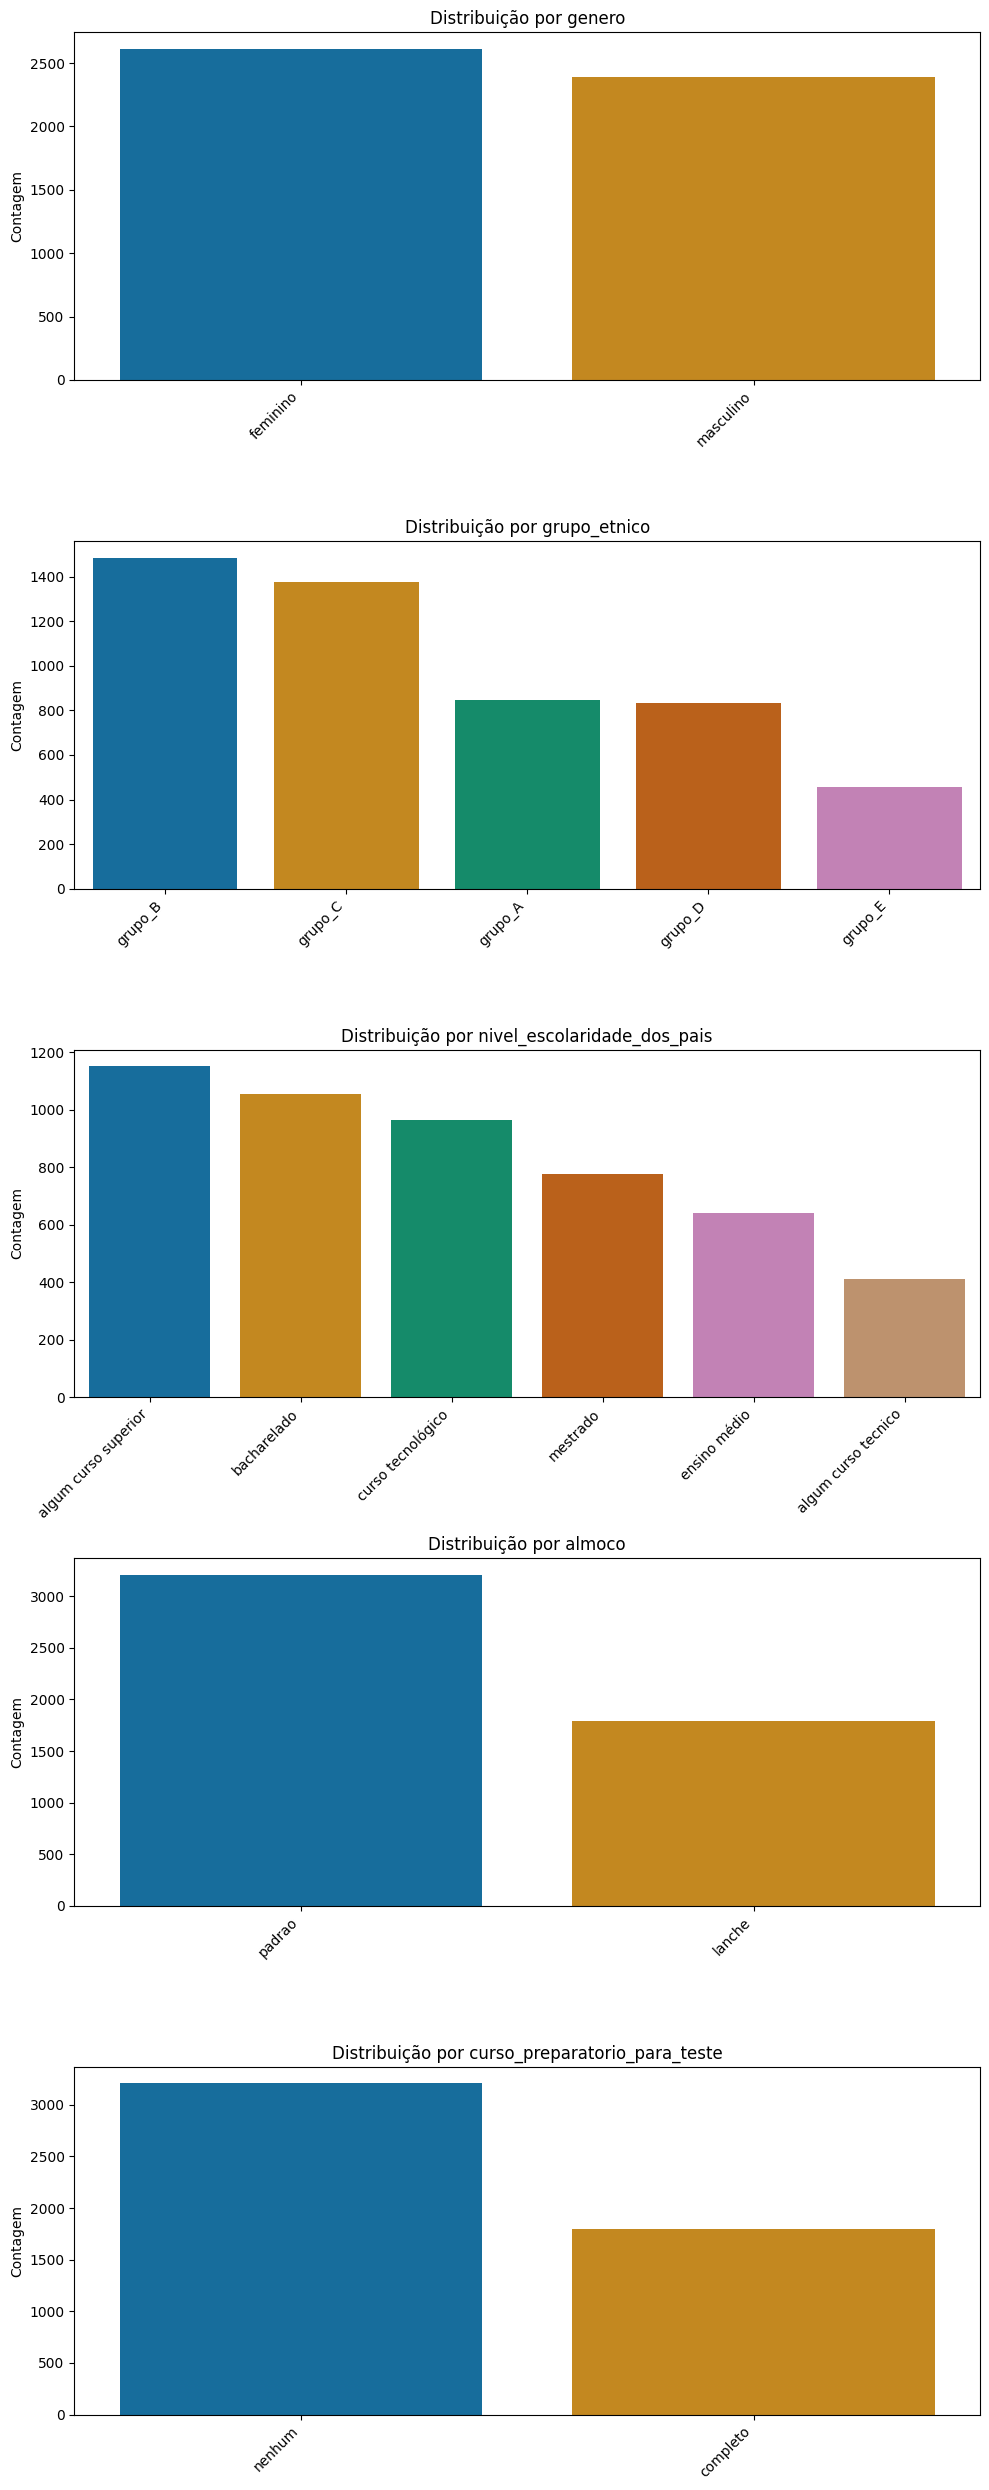

In [21]:
categorical_columns = ['genero', 'grupo_etnico', 'nivel_escolaridade_dos_pais', 'almoco', 'curso_preparatorio_para_teste']

plt.figure(figsize=(10, 25)) # Ajustando o tamanho da figura para layout vertical

for i, col in enumerate(categorical_columns):
    plt.subplot(len(categorical_columns), 1, i + 1) # Alterando a grade de subplot para uma coluna
    counts = df[col].value_counts()
    sns.barplot(x=counts.index, y=counts.values, palette='colorblind') # Usando paleta para daltônicos para gráfico de barras
    plt.title(f'Distribuição por {col}')
    plt.ylabel('Contagem')
    plt.xlabel('')
    plt.xticks(rotation=45, ha='right') # Girar os rótulos do eixo x para melhor legibilidade

plt.tight_layout()
plt.show()


#Gráficos de colunas utilizando a porccentagem

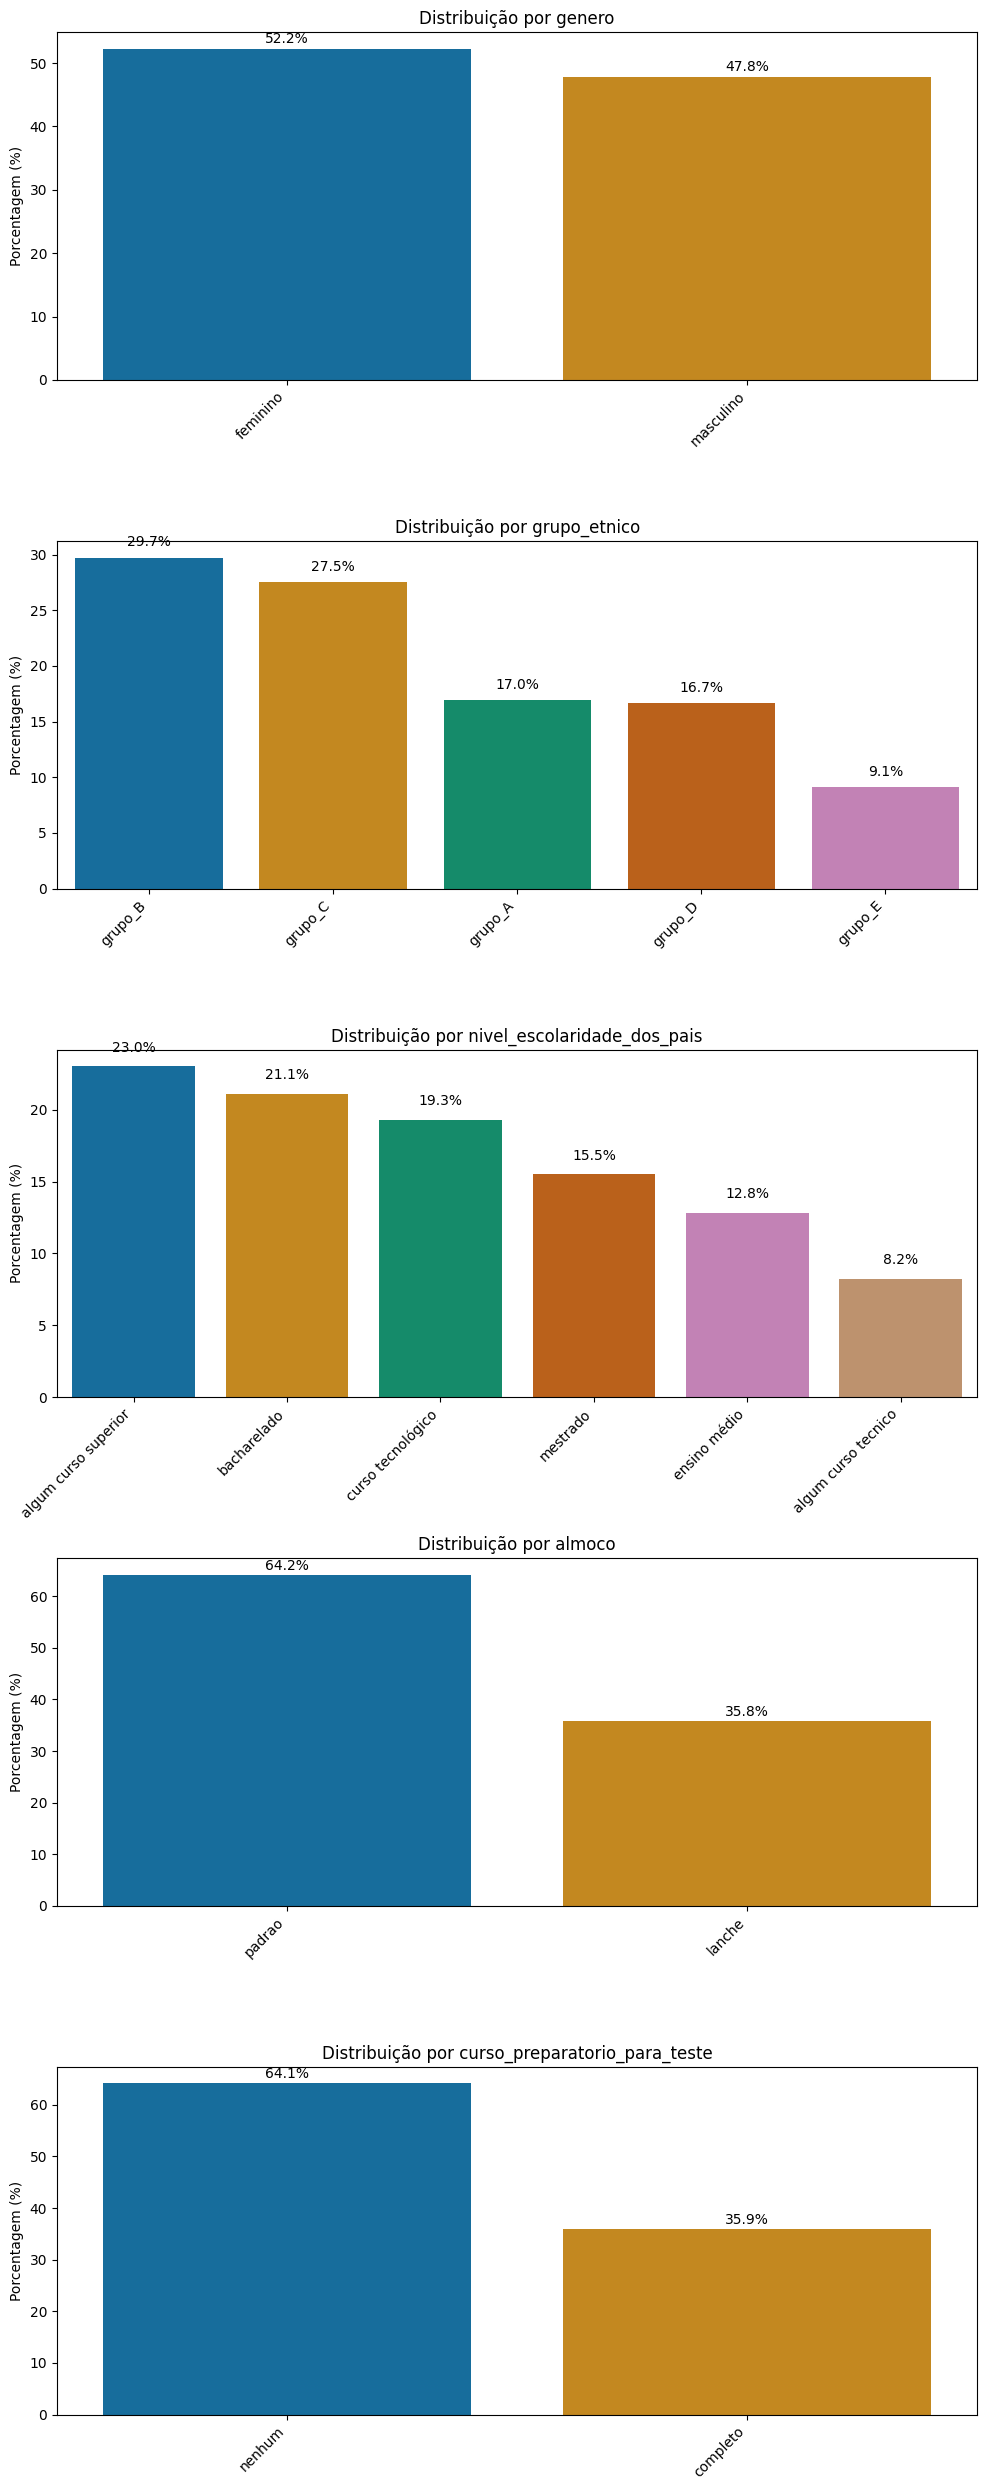

In [22]:
categorical_columns = ['genero', 'grupo_etnico', 'nivel_escolaridade_dos_pais', 'almoco', 'curso_preparatorio_para_teste']

plt.figure(figsize=(10, 25)) # Ajustando o tamanho da figura para layout vertical

for i, col in enumerate(categorical_columns):
    plt.subplot(len(categorical_columns), 1, i + 1) # Alterando a grade de subplot para uma coluna
    counts = df[col].value_counts()
    percentages = counts / counts.sum() * 100 # Calcular porcentagens

    sns.barplot(x=counts.index, y=percentages, palette='colorblind') # Usando paleta para daltônicos para gráfico de barras com porcentagens
    plt.title(f'Distribuição por {col}')
    plt.ylabel('Porcentagem (%)')
    plt.xlabel('')
    plt.xticks(rotation=45, ha='right') # Gire os rótulos do eixo x para melhor legibilidade

    # Adicionar rótulos de porcentagem nas barras
    for j, p in enumerate(percentages):
        plt.text(j, p + 1, f'{p:.1f}%', ha='center')

plt.tight_layout()
plt.show()

#Gráfico de colunas com a plotly

In [23]:
categorical_columns = ['genero', 'grupo_etnico', 'nivel_escolaridade_dos_pais', 'almoco', 'curso_preparatorio_para_teste']

for col in categorical_columns:
    counts = df[col].value_counts()
    percentages = counts / counts.sum() * 100
    fig = px.bar(x=percentages.index, y=percentages.values, title=f'Distribuição por {col} (%)',
                 labels={'x': '', 'y': 'Porcentagem (%)'}, color=percentages.index, color_discrete_sequence=px.colors.sequential.Cividis) # Using Cividis color scale
    fig.update_layout(xaxis_tickangle=-45)
    fig.show()

#Gráfico de colunas com a plotly contagem e porcentagem

In [24]:
categorical_columns = ['genero', 'grupo_etnico', 'nivel_escolaridade_dos_pais', 'almoco', 'curso_preparatorio_para_teste']

for col in categorical_columns:
    counts = df[col].value_counts().reset_index()
    counts.columns = [col, 'Contagem']
    counts['Porcentagem'] = (counts['Contagem'] / counts['Contagem'].sum()) * 100

    fig = px.bar(counts, x=col, y='Contagem', title=f'Distribuição por {col} (Contagem e Porcentagem)',
                 labels={'Contagem': 'Contagem'}, color=col, color_discrete_sequence=px.colors.sequential.Cividis,
                 hover_data={'Porcentagem': ':.2f', 'Contagem': True}) # Adicionar porcentagem aos dados de foco

    fig.update_layout(xaxis_tickangle=-45)
    fig.show()

#Medidas estatísticas
display(df.describe())

,nota_matematica,nota_leitura,nota_escrita
count,5000.000000,5000.00000,5000.000000
mean,65.892600,69.31480,67.992200
std,15.044798,14.52461,14.951791
min,0.000000,12.00000,10.000000
25%,56.000000,60.00000,58.000000
50%,66.000000,70.00000,68.000000
75%,76.000000,79.00000,78.000000
max,100.000000,100.00000,100.000000


#Gráficos boxplot

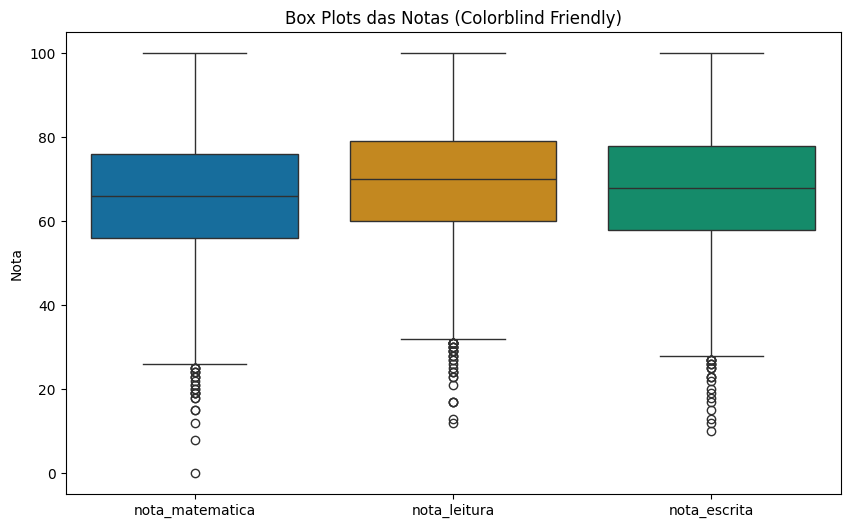

In [25]:
numerical_columns = ['nota_matematica', 'nota_leitura', 'nota_escrita']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_columns], palette='colorblind')
plt.title('Box Plots das Notas (Colorblind Friendly)')
plt.ylabel('Nota')
plt.show()

#Leitura da base modificada

In [26]:
df_1 = pd.read_excel('/content/Analise_Performance_Estudantes_modificado.xlsx')
display(df_1.head())

,genero,grupo_etnico,nivel_escolaridade_dos_pais,almoco,curso_preparatorio_para_teste,nota_matematica,nota_leitura,nota_escrita
0,feminino,grupo_B,bacharelado,padrao,nenhum,72,72,74
1,feminino,grupo_C,algum curso superior,padrao,completo,69,90,88
2,feminino,grupo_B,mestrado,padrao,nenhum,90,95,93
3,masculino,grupo_A,curso tecnológico,lanche,nenhum,47,57,44
4,masculino,grupo_C,algum curso superior,padrao,nenhum,76,78,75


#Correlação

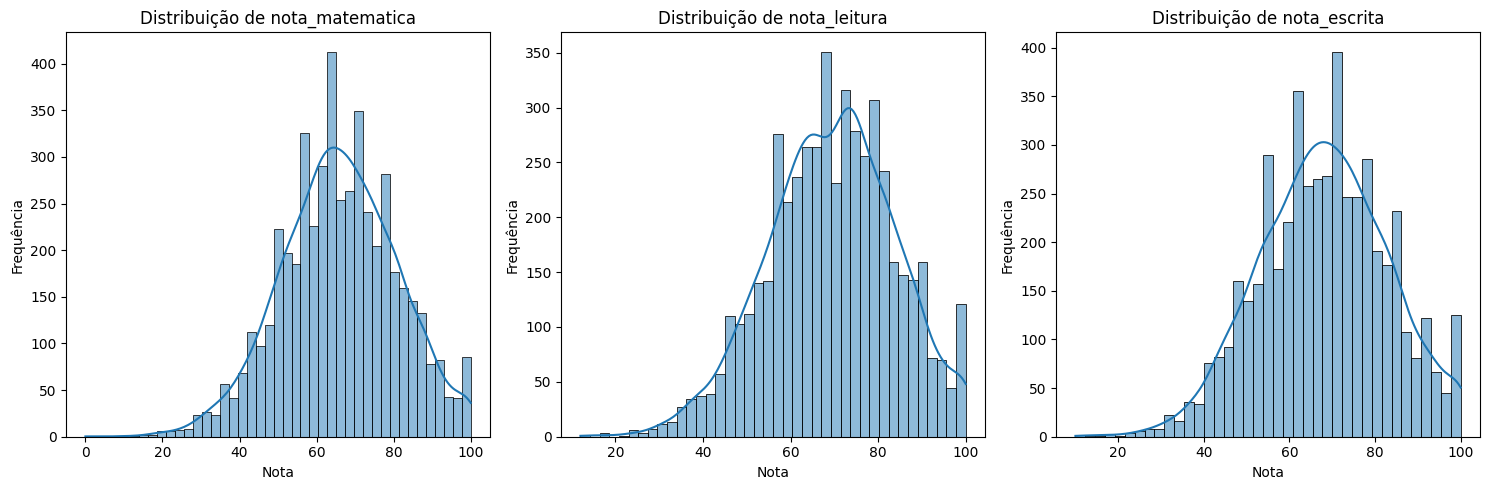

In [27]:
#Correlação

numerical_columns = ['nota_matematica', 'nota_leitura', 'nota_escrita']
plt.figure(figsize=(15, 5)) # Ajustando o tamanho da figura para layout horizontal

for i, col in enumerate(numerical_columns):
    plt.subplot(1, 3, i + 1) # Alterar a grade do subplot para uma linha e três colunas
    sns.histplot(data=df_1, x=col, kde=True, palette='viridis')
    plt.title(f'Distribuição de {col}')
    plt.xlabel('Nota')
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()



#Mapa de calor de correlação

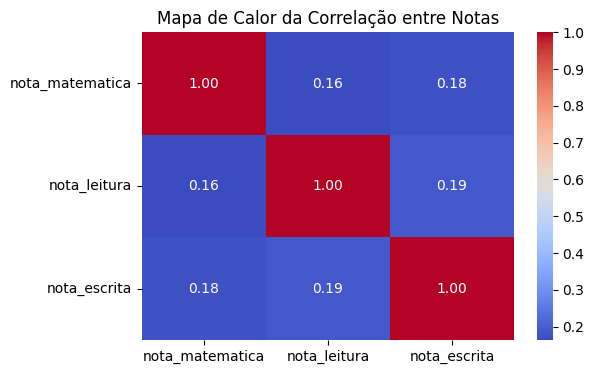

In [28]:
numerical_columns = ['nota_matematica', 'nota_leitura', 'nota_escrita']
correlation_matrix = df_1[numerical_columns].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor da Correlação entre Notas')
plt.show()



#Gráfico de dispersão

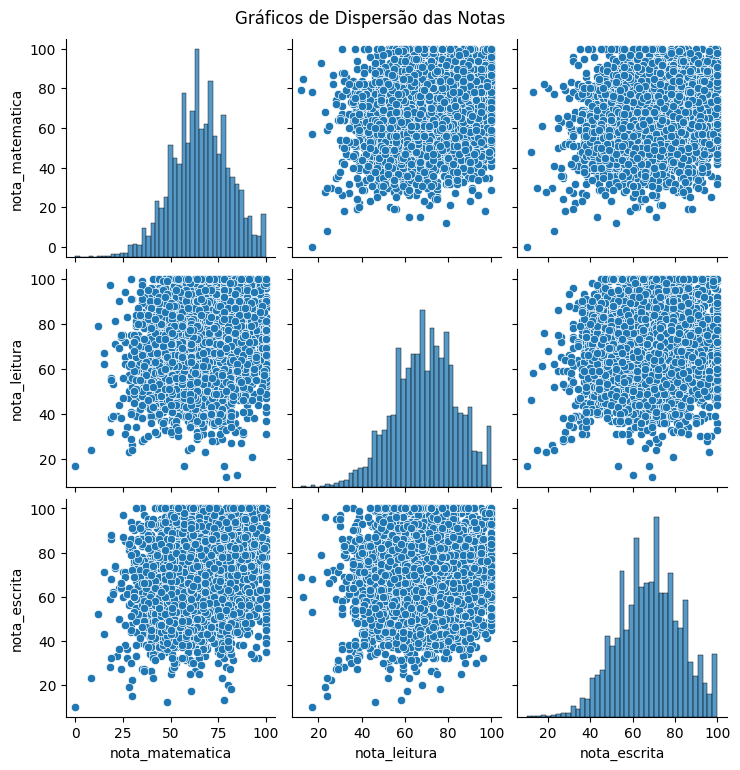

In [29]:
numerical_columns = ['nota_matematica', 'nota_leitura', 'nota_escrita']
sns.pairplot(df_1[numerical_columns])
plt.suptitle('Gráficos de Dispersão das Notas', y=1.02)
plt.show()

#Cálculo da probabilidade para a nota de matematica menor que 40

In [30]:
from scipy.stats import norm

# Calcular a média e o desvio padrão da nota de matemática

In [31]:
media_matematica = df_1['nota_matematica'].mean()
desvio_padrao_matematica = df_1['nota_matematica'].std()

# Criar uma distribuição normal com a média e desvio padrão calculados

In [32]:
distribuicao_normal_matematica = norm(media_matematica, desvio_padrao_matematica)

# Calcular a probabilidade da nota ser menor que 40

In [33]:
probabilidade_menor_que_40 = distribuicao_normal_matematica.cdf(40) * 100

print(f"A probabilidade da nota de matemática ser menor que 40 (assumindo distribuição normal) é: {probabilidade_menor_que_40:.2f}%")

A probabilidade da nota de matemática ser menor que 40 (assumindo distribuição normal) é: 4.26%


# Calcular a probabilidade da nota ser maior que 70

In [34]:
# P(X > 70) = 1 - P(X <= 70)
probabilidade_maior_que_70 = (1 - distribuicao_normal_matematica.cdf(70)) * 100

print(f"A probabilidade da nota de matemática ser maior que 70 (assumindo distribuição normal) é: {probabilidade_maior_que_70:.2f}%")

A probabilidade da nota de matemática ser maior que 70 (assumindo distribuição normal) é: 39.24%


# Calcular a probabilidade da nota estar entre 35 e 60

In [35]:
# P(35 < X < 60) = P(X <= 60) - P(X <= 35)
probabilidade_entre_35_e_60 = (distribuicao_normal_matematica.cdf(60) - distribuicao_normal_matematica.cdf(35)) * 100

print(f"A probabilidade da nota de matemática estar no intervalo entre 35 e 60 (assumindo distribuição normal) é: {probabilidade_entre_35_e_60:.2f}%")

A probabilidade da nota de matemática estar no intervalo entre 35 e 60 (assumindo distribuição normal) é: 32.76%


#Condições quaisquer de normalidade

In [41]:
def calcular_probabilidades_normal(media, desvio_padrao, x):
  # Calcula a probabilidade de um valor ser menor que x e maior que x

  # A FDC (Função de Distribuição Cumulativa) retorna P(X <= x)
  probabilidade_menor_que_x = norm.cdf(x, media, desvio_padrao)

  # A probabilidade total é 1, então P(X > x) = 1 - P(X <= x)
  probabilidade_maior_que_x = 1 - probabilidade_menor_que_x

  return (probabilidade_menor_que_x, probabilidade_maior_que_x)


In [45]:
media = 174
desvio_padrao = 8
valor_x = 180

prob_menor, prob_maior = calcular_probabilidades_normal(media, desvio_padrao, valor_x)

print(f"Para uma distribuição normal com média {media:.2f} e desvio padrão {desvio_padrao:.2f}:")
print(f"A probabilidade de um valor ser menor que {valor_x} é: {prob_menor:.2f}%")
print(f"A probabilidade de um valor ser maior que {valor_x} é: {prob_maior:.2f}%")


from scipy.stats import norm

media = 5000
desvio_padrao = 1500
valor_x1 = 4000
valor_x2 = 7000

Para uma distribuição normal com média 174.00 e desvio padrão 8.00:
A probabilidade de um valor ser menor que 180 é: 0.77%
A probabilidade de um valor ser maior que 180 é: 0.23%


# Criar a distribuição normal

In [46]:
distribuicao = norm(media, desvio_padrao)

# Calcular a probabilidade de estar entre x1 e x2: P(x1 < X < x2) = P(X <= x2) - P(X <= x1

In [44]:
valor_x1 = 4000
valor_x2 = 7000
probabilidade_entre_x1_x2 = (distribuicao.cdf(valor_x2) - distribuicao.cdf(valor_x1)) * 100
print(f"Para uma distribuição normal com média {media:.2f} e desvio padrão {desvio_padrao:.2f}:")
print(f"A probabilidade de um valor estar no intervalo entre {valor_x1} e {valor_x2} é: {probabilidade_entre_x1_x2:.2f}%")

Para uma distribuição normal com média 5000.00 e desvio padrão 1500.00:
A probabilidade de um valor estar no intervalo entre 4000 e 7000 é: 65.63%
